In [1]:
import numpy
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from keras.layers import Convolution2D as Conv2D
from keras.utils import np_utils

LOADING Data

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

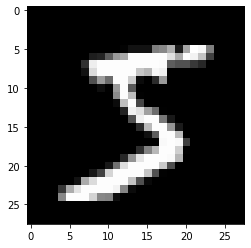

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='gray')

RESHAPING THE DATA

In [7]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

ONE_HOT ENCODING

In [8]:
num_of_classes = 10
y_train = np_utils.to_categorical(y_train,num_of_classes)
y_test = np_utils.to_categorical(y_test,num_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

 **MODEL BUILDING**

Creating Model (Add CNN Layers)

In [10]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(num_of_classes,activation='softmax'))

2022-11-16 10:45:20.956705: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 10:45:20.957611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 10:45:21.102193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 10:45:21.103045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 10:45:21.103821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

COMPILING THE MODEL

In [11]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

Fitting the model

In [13]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0351 - accuracy: 0.9924 - val_loss: 0.1918 - val_accuracy: 0.9757
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0137 - accuracy: 0.9964 - val_loss: 0.1957 - val_accuracy: 0.9763
Epoch 3/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0169 - accuracy: 0.9959 - val_loss: 0.1876 - val_accuracy: 0.9803
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0111 - accuracy: 0.9972 - val_loss: 0.1803 - val_accuracy: 0.9788
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0106 - accuracy: 0.9975 - val_loss: 0.2045 - val_accuracy: 0.9769
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0136 - accuracy: 0.9966 - val_loss: 0.1979 - val_accuracy: 0.9768
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0090 - accuracy: 0.9978 - val_loss: 0.1961 - val_accuracy: 0.9798
Epoch 

In [15]:
!zip "Model_Weights.zip" -r "./Model_Weights"

  adding: Model_Weights/ (stored 0%)
  adding: Model_Weights/keras_metadata.pb (deflated 88%)
  adding: Model_Weights/assets/ (stored 0%)
  adding: Model_Weights/saved_model.pb (deflated 87%)
  adding: Model_Weights/variables/ (stored 0%)
  adding: Model_Weights/variables/variables.index (deflated 63%)
  adding: Model_Weights/variables/variables.data-00000-of-00001 (deflated 17%)


Observing the Metrics

In [16]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Loss& Accuracy)")
print(metrics)

Metrics(Loss& Accuracy)
[0.46294456720352173, 0.9733999967575073]


Predicting the model with 4 data samples

In [20]:
prediction=model.predict(X_test[:4])
print(prediction)

[[0.0000000e+00 0.0000000e+00 2.9836314e-27 5.0799663e-16 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.6090606e-38]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 6.7683508e-24 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0184753e-15 1.0000000e+00 3.3053703e-16 2.4532675e-34 3.1360616e-14
  1.2921648e-19 6.0494335e-23 4.5093047e-20 7.4041910e-12 9.1425047e-34]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.1649511e-28]]


In [21]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Saving the Model

In [22]:
model.save('models/mnistCNN.h5')